**This is a scrap notebook that I used to make initial regressions that compared wages and employment across all general healtchare related industries. In the main notebook and my thesis, I limit the industries to a more specific subset of the healthcare industry based on the occupations that I chose to investigate.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pyreadstat
import requests
import statsmodels.api as smf
from stargazer.stargazer import Stargazer

In [2]:
# Look at Years 2000 - 2017
# Look only at Physicians and Surgeons, and Secretaries

medical_dict = {} 
medical_dict['291060'] = 'Physicians & Surgeons'
medical_dict['436010'] = 'Secretaries & Administrative Assistants'
 edi

medical_codes = list(medical_dict.keys())

medical_inds = {}
medical_inds[812] = 'Offices and clinics of physicians'
medical_inds[820] = 'Offices and clinics of dentists' 
medical_inds[821] = 'Offices and clinics of chripractors' 
medical_inds[822] = 'Offices and clinics of optometrists' 
medical_inds[830] = 'Offices and clinics of health practictioers, n.e.c' 
medical_inds[831] = 'Hospitals' 
medical_inds[832] = 'Nursing and personal care facilities' 
medical_inds[840] = 'Health services, n.e.c' 

medical_ind_codes = list(medical_inds.keys())

In [3]:
# Assumptions: Looking only @ Full-Time, Full-Year Workers (35+ hours worked, 40+ weeks worked)

# read in IPUMS Data and take only full-time full-year workers in medical jobs and industries
# also only take ages 18-65

TextFileReader = pd.read_csv("data/usa_00010.csv", chunksize = 20000)

def calculate_emp(x, y): 
    if (x == 1): 
        return x*y
    else: 
        return 0 

dfList_medical = []
counter = 0
for df in TextFileReader: 
    
    # extract important rows 
    df = df[(df['AGE'] >= 18) & (df['AGE'] <= 65)]
    
    # get only occupations of interest from 2000 to 2017 
    df = df[(df['OCCSOC'].isin(medical_codes)) & (df['IND1990'].isin(medical_ind_codes))]
    
    # get full-time, full-year workers (35+ hours/wk, 40+ wks/yr)
    df = df[(df['UHRSWORK'] >= 35)]
    df = df[(df['WKSWORK1'] >= 40) | (df['WKSWORK2'] >= 4)]
    
    dfList_medical.append(df)
    
    # verbose...
    counter += 1 
    if (counter % 100000): 
        print("processed ", round(counter*20000*100/65483126, 3), " percent of rows")

df_medical = pd.concat(dfList_medical, sort=False)
df_medical

processed  0.031  percent of rows
processed  0.061  percent of rows
processed  0.092  percent of rows
processed  0.122  percent of rows
processed  0.153  percent of rows
processed  0.183  percent of rows
processed  0.214  percent of rows
processed  0.244  percent of rows
processed  0.275  percent of rows
processed  0.305  percent of rows
processed  0.336  percent of rows
processed  0.367  percent of rows
processed  0.397  percent of rows
processed  0.428  percent of rows
processed  0.458  percent of rows
processed  0.489  percent of rows
processed  0.519  percent of rows
processed  0.55  percent of rows
processed  0.58  percent of rows
processed  0.611  percent of rows
processed  0.641  percent of rows
processed  0.672  percent of rows
processed  0.702  percent of rows
processed  0.733  percent of rows
processed  0.764  percent of rows
processed  0.794  percent of rows
processed  0.825  percent of rows
processed  0.855  percent of rows
processed  0.886  percent of rows
processed  0.916

processed  7.422  percent of rows
processed  7.452  percent of rows
processed  7.483  percent of rows
processed  7.513  percent of rows
processed  7.544  percent of rows
processed  7.574  percent of rows
processed  7.605  percent of rows
processed  7.636  percent of rows
processed  7.666  percent of rows
processed  7.697  percent of rows
processed  7.727  percent of rows
processed  7.758  percent of rows
processed  7.788  percent of rows
processed  7.819  percent of rows
processed  7.849  percent of rows
processed  7.88  percent of rows
processed  7.91  percent of rows
processed  7.941  percent of rows
processed  7.972  percent of rows
processed  8.002  percent of rows
processed  8.033  percent of rows
processed  8.063  percent of rows
processed  8.094  percent of rows
processed  8.124  percent of rows
processed  8.155  percent of rows
processed  8.185  percent of rows
processed  8.216  percent of rows
processed  8.246  percent of rows
processed  8.277  percent of rows
processed  8.307

processed  14.782  percent of rows
processed  14.813  percent of rows
processed  14.844  percent of rows
processed  14.874  percent of rows
processed  14.905  percent of rows
processed  14.935  percent of rows
processed  14.966  percent of rows
processed  14.996  percent of rows
processed  15.027  percent of rows
processed  15.057  percent of rows
processed  15.088  percent of rows
processed  15.118  percent of rows
processed  15.149  percent of rows
processed  15.179  percent of rows
processed  15.21  percent of rows
processed  15.241  percent of rows
processed  15.271  percent of rows
processed  15.302  percent of rows
processed  15.332  percent of rows
processed  15.363  percent of rows
processed  15.393  percent of rows
processed  15.424  percent of rows
processed  15.454  percent of rows
processed  15.485  percent of rows
processed  15.515  percent of rows
processed  15.546  percent of rows
processed  15.577  percent of rows
processed  15.607  percent of rows
processed  15.638  pe

processed  22.021  percent of rows
processed  22.051  percent of rows
processed  22.082  percent of rows
processed  22.113  percent of rows
processed  22.143  percent of rows
processed  22.174  percent of rows
processed  22.204  percent of rows
processed  22.235  percent of rows
processed  22.265  percent of rows
processed  22.296  percent of rows
processed  22.326  percent of rows
processed  22.357  percent of rows
processed  22.387  percent of rows
processed  22.418  percent of rows
processed  22.449  percent of rows
processed  22.479  percent of rows
processed  22.51  percent of rows
processed  22.54  percent of rows
processed  22.571  percent of rows
processed  22.601  percent of rows
processed  22.632  percent of rows
processed  22.662  percent of rows
processed  22.693  percent of rows
processed  22.723  percent of rows
processed  22.754  percent of rows
processed  22.784  percent of rows
processed  22.815  percent of rows
processed  22.846  percent of rows
processed  22.876  per

processed  29.229  percent of rows
processed  29.259  percent of rows
processed  29.29  percent of rows
processed  29.321  percent of rows
processed  29.351  percent of rows
processed  29.382  percent of rows
processed  29.412  percent of rows
processed  29.443  percent of rows
processed  29.473  percent of rows
processed  29.504  percent of rows
processed  29.534  percent of rows
processed  29.565  percent of rows
processed  29.595  percent of rows
processed  29.626  percent of rows
processed  29.656  percent of rows
processed  29.687  percent of rows
processed  29.718  percent of rows
processed  29.748  percent of rows
processed  29.779  percent of rows
processed  29.809  percent of rows
processed  29.84  percent of rows
processed  29.87  percent of rows
processed  29.901  percent of rows
processed  29.931  percent of rows
processed  29.962  percent of rows
processed  29.992  percent of rows
processed  30.023  percent of rows
processed  30.054  percent of rows
processed  30.084  perc

processed  36.498  percent of rows
processed  36.528  percent of rows
processed  36.559  percent of rows
processed  36.59  percent of rows
processed  36.62  percent of rows
processed  36.651  percent of rows
processed  36.681  percent of rows
processed  36.712  percent of rows
processed  36.742  percent of rows
processed  36.773  percent of rows
processed  36.803  percent of rows
processed  36.834  percent of rows
processed  36.864  percent of rows
processed  36.895  percent of rows
processed  36.926  percent of rows
processed  36.956  percent of rows
processed  36.987  percent of rows
processed  37.017  percent of rows
processed  37.048  percent of rows
processed  37.078  percent of rows
processed  37.109  percent of rows
processed  37.139  percent of rows
processed  37.17  percent of rows
processed  37.2  percent of rows
processed  37.231  percent of rows
processed  37.262  percent of rows
processed  37.292  percent of rows
processed  37.323  percent of rows
processed  37.353  percen

processed  43.767  percent of rows
processed  43.798  percent of rows
processed  43.828  percent of rows
processed  43.859  percent of rows
processed  43.889  percent of rows
processed  43.92  percent of rows
processed  43.95  percent of rows
processed  43.981  percent of rows
processed  44.011  percent of rows
processed  44.042  percent of rows
processed  44.072  percent of rows
processed  44.103  percent of rows
processed  44.134  percent of rows
processed  44.164  percent of rows
processed  44.195  percent of rows
processed  44.225  percent of rows
processed  44.256  percent of rows
processed  44.286  percent of rows
processed  44.317  percent of rows
processed  44.347  percent of rows
processed  44.378  percent of rows
processed  44.408  percent of rows
processed  44.439  percent of rows
processed  44.469  percent of rows
processed  44.5  percent of rows
processed  44.531  percent of rows
processed  44.561  percent of rows
processed  44.592  percent of rows
processed  44.622  perce

processed  51.006  percent of rows
processed  51.036  percent of rows
processed  51.067  percent of rows
processed  51.097  percent of rows
processed  51.128  percent of rows
processed  51.158  percent of rows
processed  51.189  percent of rows
processed  51.219  percent of rows
processed  51.25  percent of rows
processed  51.28  percent of rows
processed  51.311  percent of rows
processed  51.341  percent of rows
processed  51.372  percent of rows
processed  51.403  percent of rows
processed  51.433  percent of rows
processed  51.464  percent of rows
processed  51.494  percent of rows
processed  51.525  percent of rows
processed  51.555  percent of rows
processed  51.586  percent of rows
processed  51.616  percent of rows
processed  51.647  percent of rows
processed  51.677  percent of rows
processed  51.708  percent of rows
processed  51.739  percent of rows
processed  51.769  percent of rows
processed  51.8  percent of rows
processed  51.83  percent of rows
processed  51.861  percen

processed  58.244  percent of rows
processed  58.275  percent of rows
processed  58.305  percent of rows
processed  58.336  percent of rows
processed  58.366  percent of rows
processed  58.397  percent of rows
processed  58.427  percent of rows
processed  58.458  percent of rows
processed  58.488  percent of rows
processed  58.519  percent of rows
processed  58.549  percent of rows
processed  58.58  percent of rows
processed  58.611  percent of rows
processed  58.641  percent of rows
processed  58.672  percent of rows
processed  58.702  percent of rows
processed  58.733  percent of rows
processed  58.763  percent of rows
processed  58.794  percent of rows
processed  58.824  percent of rows
processed  58.855  percent of rows
processed  58.885  percent of rows
processed  58.916  percent of rows
processed  58.946  percent of rows
processed  58.977  percent of rows
processed  59.008  percent of rows
processed  59.038  percent of rows
processed  59.069  percent of rows
processed  59.099  pe

processed  65.421  percent of rows
processed  65.452  percent of rows
processed  65.483  percent of rows
processed  65.513  percent of rows
processed  65.544  percent of rows
processed  65.574  percent of rows
processed  65.605  percent of rows
processed  65.635  percent of rows
processed  65.666  percent of rows
processed  65.696  percent of rows
processed  65.727  percent of rows
processed  65.757  percent of rows
processed  65.788  percent of rows
processed  65.818  percent of rows
processed  65.849  percent of rows
processed  65.88  percent of rows
processed  65.91  percent of rows
processed  65.941  percent of rows
processed  65.971  percent of rows
processed  66.002  percent of rows
processed  66.032  percent of rows
processed  66.063  percent of rows
processed  66.093  percent of rows
processed  66.124  percent of rows
processed  66.154  percent of rows
processed  66.185  percent of rows
processed  66.216  percent of rows
processed  66.246  percent of rows
processed  66.277  per

processed  72.69  percent of rows
processed  72.721  percent of rows
processed  72.752  percent of rows
processed  72.782  percent of rows
processed  72.813  percent of rows
processed  72.843  percent of rows
processed  72.874  percent of rows
processed  72.904  percent of rows
processed  72.935  percent of rows
processed  72.965  percent of rows
processed  72.996  percent of rows
processed  73.026  percent of rows
processed  73.057  percent of rows
processed  73.088  percent of rows
processed  73.118  percent of rows
processed  73.149  percent of rows
processed  73.179  percent of rows
processed  73.21  percent of rows
processed  73.24  percent of rows
processed  73.271  percent of rows
processed  73.301  percent of rows
processed  73.332  percent of rows
processed  73.362  percent of rows
processed  73.393  percent of rows
processed  73.423  percent of rows
processed  73.454  percent of rows
processed  73.485  percent of rows
processed  73.515  percent of rows
processed  73.546  perc

processed  79.96  percent of rows
processed  79.99  percent of rows
processed  80.021  percent of rows
processed  80.051  percent of rows
processed  80.082  percent of rows
processed  80.112  percent of rows
processed  80.143  percent of rows
processed  80.173  percent of rows
processed  80.204  percent of rows
processed  80.234  percent of rows
processed  80.265  percent of rows
processed  80.295  percent of rows
processed  80.326  percent of rows
processed  80.357  percent of rows
processed  80.387  percent of rows
processed  80.418  percent of rows
processed  80.448  percent of rows
processed  80.479  percent of rows
processed  80.509  percent of rows
processed  80.54  percent of rows
processed  80.57  percent of rows
processed  80.601  percent of rows
processed  80.631  percent of rows
processed  80.662  percent of rows
processed  80.693  percent of rows
processed  80.723  percent of rows
processed  80.754  percent of rows
processed  80.784  percent of rows
processed  80.815  perce

processed  87.167  percent of rows
processed  87.198  percent of rows
processed  87.229  percent of rows
processed  87.259  percent of rows
processed  87.29  percent of rows
processed  87.32  percent of rows
processed  87.351  percent of rows
processed  87.381  percent of rows
processed  87.412  percent of rows
processed  87.442  percent of rows
processed  87.473  percent of rows
processed  87.503  percent of rows
processed  87.534  percent of rows
processed  87.565  percent of rows
processed  87.595  percent of rows
processed  87.626  percent of rows
processed  87.656  percent of rows
processed  87.687  percent of rows
processed  87.717  percent of rows
processed  87.748  percent of rows
processed  87.778  percent of rows
processed  87.809  percent of rows
processed  87.839  percent of rows
processed  87.87  percent of rows
processed  87.901  percent of rows
processed  87.931  percent of rows
processed  87.962  percent of rows
processed  87.992  percent of rows
processed  88.023  perc

processed  94.375  percent of rows
processed  94.406  percent of rows
processed  94.437  percent of rows
processed  94.467  percent of rows
processed  94.498  percent of rows
processed  94.528  percent of rows
processed  94.559  percent of rows
processed  94.589  percent of rows
processed  94.62  percent of rows
processed  94.65  percent of rows
processed  94.681  percent of rows
processed  94.711  percent of rows
processed  94.742  percent of rows
processed  94.773  percent of rows
processed  94.803  percent of rows
processed  94.834  percent of rows
processed  94.864  percent of rows
processed  94.895  percent of rows
processed  94.925  percent of rows
processed  94.956  percent of rows
processed  94.986  percent of rows
processed  95.017  percent of rows
processed  95.047  percent of rows
processed  95.078  percent of rows
processed  95.108  percent of rows
processed  95.139  percent of rows
processed  95.17  percent of rows
processed  95.2  percent of rows
processed  95.231  percen

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEICP,STRATA,GQ,PERNUM,...,OCCSOC,IND,IND1990,INDNAICS,WKSWORK1,WKSWORK2,UHRSWORK,LOOKING,WORKEDYR,INCWAGE
7,2000,200001,2,NaN,18,2000000000021,5,60,1,1,...,291060,809,840,6214,52.0,6,50,0,3,150000
40,2000,200001,19,NaN,13,2000000000191,5,64,1,1,...,291060,797,812,6211,52.0,6,50,0,3,0
348,2000,200001,157,NaN,18,2000000001571,5,65,1,1,...,291060,797,812,6211,48.0,5,60,0,3,294000
381,2000,200001,172,NaN,15,2000000001721,5,64,1,1,...,291060,797,812,6211,52.0,6,64,0,3,294000
412,2000,200001,184,NaN,21,2000000001841,5,60,1,2,...,436010,819,831,622,41.0,4,40,0,3,17700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59027373,2017,201701,1393601,2.017001e+12,64,2017013936011,68,30056,1,2,...,436010,8170,840,6216,NaN,6,40,1,3,24000
59027642,2017,201701,1393708,2.017001e+12,52,2017013937081,68,30056,1,2,...,291060,8190,831,622,NaN,6,60,3,3,460000
59027808,2017,201701,1393777,2.017001e+12,21,2017013937771,68,10056,1,1,...,291060,7970,812,6211,NaN,6,60,3,3,0
59028544,2017,201701,1394086,2.017001e+12,105,2017013940861,68,40056,1,1,...,291060,8190,831,622,NaN,6,80,2,3,460000


**WAGE REGRESSIONS**

In [4]:
# SOURCE: https://usa.ipums.org/usa/cpi99.shtml
cpi99 = {} 
cpi99[1980] = 2.295 
cpi99[1990] = 1.344
cpi99[2000] = 0.967
cpi99[2001] = 0.941
cpi99[2002] = 0.926
cpi99[2003] = 0.905
cpi99[2004] = 0.882
cpi99[2005] = 0.853
cpi99[2006] = 0.826
cpi99[2007] = 0.804
cpi99[2008] = 0.774
cpi99[2009] = 0.777
cpi99[2010] = 0.764
cpi99[2011] = 0.741
cpi99[2012] = 0.726
cpi99[2013] = 0.715
cpi99[2014] = 0.704
cpi99[2015] = 0.703
cpi99[2016] = 0.694
cpi99[2017] = 0.679
cpi99[2018] = 0.663
cpi99[2019] = 0.652

def convert_99(x, y):
    return cpi99[x]*y

In [72]:
# For Wages, need to only look at those who are employed
df_medical = df_medical[df_medical['EMPSTAT'] == 1]
df_medical = df_medical[df_medical['INCWAGE'] != 0]
df_medical = df_medical[df_medical['YEAR'] >= 2001]
df_medical['INCWAGE_REAL'] = df_medical.apply(lambda x: convert_99(x['YEAR'], x['INCWAGE']), axis=1)
df_medical['LOGWAGE_REAL'] = np.log(df_medical['INCWAGE_REAL'])

def fracfemale(series):
    num_female = 0
    for elem in series: 
        if elem == 2: 
            num_female += 1
    
    return num_female/len(series)

def fraccollege(series): 
    num_college = 0
    for elem in series: 
        if elem >= 7: 
            num_college += 1
    
    return num_college/len(series)

def fracwhite(series): 
    num_white = 0
    for elem in series: 
        if elem == 1: 
            num_white += 1
    
    return num_white/len(series)

# group by year and occupational code
wage_df_med = df_medical.groupby(['YEAR', 'OCCSOC', 'IND1990']).agg({'EDUC': fraccollege, 
                                                                     'AGE': 'mean',
                                                                     'SEX': fracfemale,
                                                                     'RACE': fracwhite,
                                                                     'LOGWAGE_REAL': 'mean'}).reset_index()

#wage_df_med['LOGEDUC'] = np.log(wage_df_med['EDUC'])
#wage_df_med['LOGAGE'] = np.log(wage_df_med['AGE'])
wage_df_med = wage_df_med[(wage_df_med['YEAR'] <= 2017)]
wage_df_med

,YEAR,OCCSOC,IND1990,EDUC,AGE,SEX,RACE,LOGWAGE_REAL
0,2001,291060,812,0.996255,46.046816,0.206929,0.830524,11.800783
1,2001,291060,820,1.000000,47.500000,0.000000,1.000000,12.091189
2,2001,291060,821,1.000000,34.500000,0.000000,1.000000,11.376837
3,2001,291060,822,1.000000,47.800000,0.400000,1.000000,11.249947
4,2001,291060,831,0.991045,39.907463,0.321393,0.737313,11.325024
...,...,...,...,...,...,...,...,...
232,2017,436010,821,0.625000,41.194444,0.958333,0.930556,9.836851
233,2017,436010,822,0.500000,45.269231,0.942308,0.903846,9.963253
234,2017,436010,831,0.587912,47.301587,0.955433,0.749084,10.094772
235,2017,436010,832,0.578313,46.343373,0.933735,0.843373,10.072794


**Difference-in-Differences**

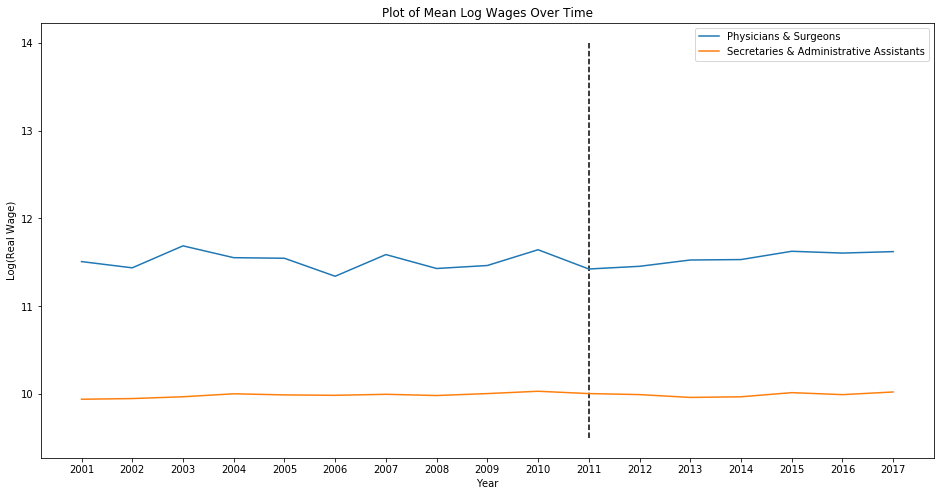

In [73]:
# graph to evaluate parallel trends
graph_df = wage_df_med.groupby(['YEAR', 'OCCSOC']).agg('mean').reset_index()
p = graph_df[graph_df['OCCSOC'] == '291060']
s = graph_df[graph_df['OCCSOC'] == '436010']

years = np.arange(2001,2018,1)

plt.figure(figsize=(16,8))
plt.plot(years, p['LOGWAGE_REAL'], label='Physicians & Surgeons')
plt.plot(years, s['LOGWAGE_REAL'], label='Secretaries & Administrative Assistants')
plt.xticks(years)
plt.vlines(2011, 9.5, 14, linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Log(Real Wage)")
plt.title("Plot of Mean Log Wages Over Time")
plt.legend()

In [74]:
wage_df_med['Pre'] = wage_df_med['YEAR'].apply(lambda x: 1 if x < 2011 else 0)
wage_df_med['Post'] = wage_df_med['YEAR'].apply(lambda x: 1 if x >= 2011 else 0)
wage_df_med['AI'] = wage_df_med['OCCSOC'].apply(lambda x: 1 if x == '436010' else 0)
wage_df_med['AIPost'] = wage_df_med['AI']*wage_df_med['Post']
#wage_df_med = wage_df_med[wage_df_med['YEAR'] >= 2005]

ind_dummies = pd.get_dummies(wage_df_med['IND1990']).rename(columns= lambda x: 'ind_' + str(x)).iloc[:, :-1]
year_dummies = pd.get_dummies(wage_df_med['YEAR']).iloc[:, :-1].rename(columns = lambda x: str(x))

In [75]:
X = wage_df_med[['Post', 'AI', 'AIPost']]
X = smf.add_constant(X)
Y = wage_df_med['LOGWAGE_REAL']
diff_wres1 = smf.OLS(Y,X).fit()

X = pd.concat([wage_df_med[['Post', 'AI', 'AIPost']], year_dummies, ind_dummies], axis=1)
X = smf.add_constant(X)
Y = wage_df_med['LOGWAGE_REAL']
diff_wres2 = smf.OLS(Y,X).fit()

X = pd.concat([wage_df_med[['Post', 'AI', 'AIPost', 'SEX', 'AGE', 'RACE', 'EDUC']], year_dummies, ind_dummies], axis=1)
X = smf.add_constant(X)
Y = wage_df_med['LOGWAGE_REAL']
diff_wres3 = smf.OLS(Y,X).fit()

stargazer = Stargazer([diff_wres1, diff_wres2, diff_wres3])
stargazer.title("Wage DiD Regs")
stargazer.custom_columns(['No Controls', 'Year FE + Ind FE', 'Year FE + Ind FE + Controls'], [1, 1, 1])
stargazer

**Ordinary Least Squares**

In [76]:
aipatents_world = pd.read_csv("data/aipatents_world.csv")
aw_wage = aipatents_world.iloc[3:, :].reset_index()[['num_patents']]
aw_wage['Year'] = np.arange(2001, 2018, 1)
wage_df_med = pd.merge(wage_df_med, aw_wage, how='inner', left_on='YEAR', right_on='Year')
wage_df_med

,YEAR,OCCSOC,IND1990,EDUC,AGE,SEX,RACE,LOGWAGE_REAL,Pre,Post,AI,AIPost,num_patents,Year
0,2001,291060,812,0.996255,46.046816,0.206929,0.830524,11.800783,1,0,0,0,1386.0,2001
1,2001,291060,820,1.000000,47.500000,0.000000,1.000000,12.091189,1,0,0,0,1386.0,2001
2,2001,291060,821,1.000000,34.500000,0.000000,1.000000,11.376837,1,0,0,0,1386.0,2001
3,2001,291060,822,1.000000,47.800000,0.400000,1.000000,11.249947,1,0,0,0,1386.0,2001
4,2001,291060,831,0.991045,39.907463,0.321393,0.737313,11.325024,1,0,0,0,1386.0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2017,436010,821,0.625000,41.194444,0.958333,0.930556,9.836851,0,1,1,1,4432.0,2017
233,2017,436010,822,0.500000,45.269231,0.942308,0.903846,9.963253,0,1,1,1,4432.0,2017
234,2017,436010,831,0.587912,47.301587,0.955433,0.749084,10.094772,0,1,1,1,4432.0,2017
235,2017,436010,832,0.578313,46.343373,0.933735,0.843373,10.072794,0,1,1,1,4432.0,2017


In [77]:
X = wage_df_med[['AI', 'num_patents']]
X = smf.add_constant(X) 
Y = wage_df_med['LOGWAGE_REAL']
ols_wage1 = smf.OLS(Y,X).fit()

X = pd.concat([wage_df_med[['AI', 'num_patents']], year_dummies, ind_dummies], axis=1)
X = smf.add_constant(X) 
Y = wage_df_med['LOGWAGE_REAL']
ols_wage2 = smf.OLS(Y,X).fit()

X = pd.concat([wage_df_med[['AI', 'num_patents', 'SEX', 'AGE', 'RACE', 'EDUC']], year_dummies, ind_dummies], axis=1)
X = smf.add_constant(X) 
Y = wage_df_med['LOGWAGE_REAL']
ols_wage3 = smf.OLS(Y,X).fit()

stargazer = Stargazer([ols_wage1, ols_wage2, ols_wage3])
stargazer.title("Wage OLS Regs")
stargazer.custom_columns(['No Controls', 'Year FE + Ind FE', 'Year FE + Ind FE + Controls'], [1, 1, 1])
stargazer

**EMPLOYMENT REGRESSIONS**

**Difference-in-Differences**

In [79]:
# group by year and occupational code
emp_df_med = df_medical_grp.groupby(['YEAR', 'OCCSOC', 'IND1990']).agg({'EDUC': fraccollege, 
                                                                        'AGE': 'mean',
                                                                        'SEX': fracfemale,
                                                                        'RACE': fracwhite,
                                                                        'PERWT': 'sum'}).reset_index()

emp_df_med = emp_df_med[(emp_df_med['YEAR'] <= 2017)]
emp_df_med['LOGEMP'] = np.log(emp_df_med['PERWT'])
#emp_df_med['LOGEDUC'] = np.log(emp_df_med['EDUC'])
#emp_df_med['LOGAGE'] = np.log(emp_df_med['AGE'])
emp_df_med

,YEAR,OCCSOC,IND1990,EDUC,AGE,SEX,RACE,PERWT,LOGEMP
0,2001,291060,812,0.996255,46.046816,0.206929,0.830524,227575,12.335235
1,2001,291060,820,1.000000,47.500000,0.000000,1.000000,353,5.866468
2,2001,291060,821,1.000000,34.500000,0.000000,1.000000,1076,6.981006
3,2001,291060,822,1.000000,47.800000,0.400000,1.000000,756,6.628041
4,2001,291060,831,0.991045,39.907463,0.321393,0.737313,230150,12.346487
...,...,...,...,...,...,...,...,...,...
232,2017,436010,821,0.625000,41.194444,0.958333,0.930556,6099,8.715880
233,2017,436010,822,0.500000,45.269231,0.942308,0.903846,5235,8.563122
234,2017,436010,831,0.587912,47.301587,0.955433,0.749084,159035,11.976880
235,2017,436010,832,0.578313,46.343373,0.933735,0.843373,16494,9.710752


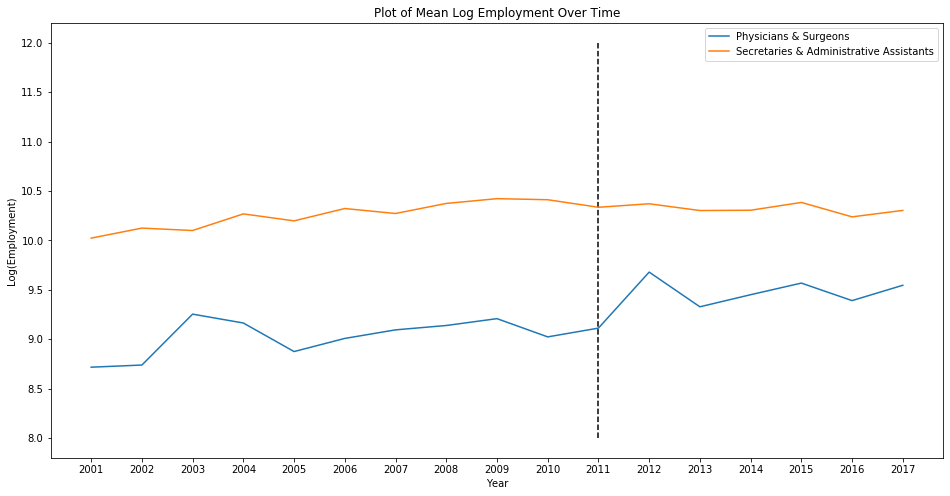

In [80]:
# graph to evaluate parallel trends
graph_df = emp_df_med.groupby(['YEAR', 'OCCSOC']).agg('mean').reset_index()
p = graph_df[graph_df['OCCSOC'] == '291060']
s = graph_df[graph_df['OCCSOC'] == '436010']

years = np.arange(2001,2018,1)

plt.figure(figsize=(16,8))
plt.plot(years, p['LOGEMP'], label='Physicians & Surgeons')
plt.plot(years, s['LOGEMP'], label='Secretaries & Administrative Assistants')
plt.xticks(years)
plt.vlines(2011, 8, 12, linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Log(Employment)")
plt.title("Plot of Mean Log Employment Over Time")
plt.legend()

In [81]:
emp_df_med['Pre'] = emp_df_med['YEAR'].apply(lambda x: 1 if x < 2011 else 0)
emp_df_med['Post'] = emp_df_med['YEAR'].apply(lambda x: 1 if x >= 2011 else 0)
emp_df_med['AI'] = emp_df_med['OCCSOC'].apply(lambda x: 1 if x == '436010' else 0)
emp_df_med['AIPost'] = emp_df_med['AI']*emp_df_med['Post']

ind_dummies = pd.get_dummies(emp_df_med['IND1990']).rename(columns= lambda x: 'ind_' + str(x)).iloc[:, :-1]
year_dummies = pd.get_dummies(emp_df_med['YEAR']).iloc[:, :-1].rename(columns = lambda x: str(x))
emp_df_med

,YEAR,OCCSOC,IND1990,EDUC,AGE,SEX,RACE,PERWT,LOGEMP,Pre,Post,AI,AIPost
0,2001,291060,812,0.996255,46.046816,0.206929,0.830524,227575,12.335235,1,0,0,0
1,2001,291060,820,1.000000,47.500000,0.000000,1.000000,353,5.866468,1,0,0,0
2,2001,291060,821,1.000000,34.500000,0.000000,1.000000,1076,6.981006,1,0,0,0
3,2001,291060,822,1.000000,47.800000,0.400000,1.000000,756,6.628041,1,0,0,0
4,2001,291060,831,0.991045,39.907463,0.321393,0.737313,230150,12.346487,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2017,436010,821,0.625000,41.194444,0.958333,0.930556,6099,8.715880,0,1,1,1
233,2017,436010,822,0.500000,45.269231,0.942308,0.903846,5235,8.563122,0,1,1,1
234,2017,436010,831,0.587912,47.301587,0.955433,0.749084,159035,11.976880,0,1,1,1
235,2017,436010,832,0.578313,46.343373,0.933735,0.843373,16494,9.710752,0,1,1,1


In [82]:
X = emp_df_med[['Post', 'AI', 'AIPost']]
X = smf.add_constant(X)
Y = emp_df_med['LOGEMP']
empferes1 = smf.OLS(Y,X).fit()

X = pd.concat([emp_df_med[['Post', 'AI', 'AIPost']], year_dummies, ind_dummies], axis=1)
X = smf.add_constant(X)
Y = emp_df_med['LOGEMP']
empferes2 = smf.OLS(Y,X).fit()

X = pd.concat([emp_df_med[['Post', 'AI', 'AIPost', 'SEX', 'AGE', 'RACE', 'EDUC']], year_dummies, ind_dummies], axis=1)
X = smf.add_constant(X)
Y = emp_df_med['LOGEMP']
empferes3 = smf.OLS(Y,X).fit()
               
stargazer = Stargazer([empferes1, empferes2, empferes3])
stargazer.title("Employment DiD Regs")
stargazer.custom_columns(['No Controls', 'Year FE + Ind FE', 'Year FE + Ind FE + Controls'], [1, 1, 1])
stargazer

**Ordinary Least Squares**

In [83]:
aipatents_world = pd.read_csv("data/aipatents_world.csv")
aw_emp = aipatents_world.iloc[3:, :].reset_index()[['num_patents']]
aw_emp['Year'] = np.arange(2001, 2018, 1)
emp_df_med = pd.merge(emp_df_med, aw_emp, how='inner', left_on='YEAR', right_on='Year')
emp_df_med

,YEAR,OCCSOC,IND1990,EDUC,AGE,SEX,RACE,PERWT,LOGEMP,Pre,Post,AI,AIPost,num_patents,Year
0,2001,291060,812,0.996255,46.046816,0.206929,0.830524,227575,12.335235,1,0,0,0,1386.0,2001
1,2001,291060,820,1.000000,47.500000,0.000000,1.000000,353,5.866468,1,0,0,0,1386.0,2001
2,2001,291060,821,1.000000,34.500000,0.000000,1.000000,1076,6.981006,1,0,0,0,1386.0,2001
3,2001,291060,822,1.000000,47.800000,0.400000,1.000000,756,6.628041,1,0,0,0,1386.0,2001
4,2001,291060,831,0.991045,39.907463,0.321393,0.737313,230150,12.346487,1,0,0,0,1386.0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2017,436010,821,0.625000,41.194444,0.958333,0.930556,6099,8.715880,0,1,1,1,4432.0,2017
233,2017,436010,822,0.500000,45.269231,0.942308,0.903846,5235,8.563122,0,1,1,1,4432.0,2017
234,2017,436010,831,0.587912,47.301587,0.955433,0.749084,159035,11.976880,0,1,1,1,4432.0,2017
235,2017,436010,832,0.578313,46.343373,0.933735,0.843373,16494,9.710752,0,1,1,1,4432.0,2017


In [84]:
X = emp_df_med[['AI', 'num_patents']]
X = smf.add_constant(X) 
Y = emp_df_med['LOGEMP']
ols_wage1 = smf.OLS(Y,X).fit()

X = pd.concat([emp_df_med[['AI', 'num_patents']], year_dummies, ind_dummies], axis=1)
X = smf.add_constant(X) 
Y = emp_df_med['LOGEMP']
ols_wage2 = smf.OLS(Y,X).fit()

X = pd.concat([emp_df_med[['AI', 'num_patents', 'SEX', 'AGE', 'RACE', 'EDUC']], year_dummies, ind_dummies], axis=1)
X = smf.add_constant(X) 
Y = emp_df_med['LOGEMP']
ols_wage3 = smf.OLS(Y,X).fit()

stargazer = Stargazer([ols_wage1, ols_wage2, ols_wage3])
stargazer.title("Employment OLS Regs")
stargazer.custom_columns(['No Controls', 'Year FE + Ind FE', 'Year FE + Ind FE + Controls'], [1, 1, 1])
stargazer